In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import pandas as pd
import prettyplotlib as ppl
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern Roman'], 'size':14})
rc('text', usetex=True)

In [2]:
# read in dataframe
df = pd.read_csv('final_data_files/uncrowded_everything_all_clipped.csv')#_clipped.csv')

# show column names for reference
print df.columns.values

['id' 'type' 'per' 'mag_j' 'merr_j' 'mag_h' 'merr_h' 'mag_k' 'merr_k'
 'mag_3' 'merr_3' 'mag_4' 'merr_4' 'resid_m4_j' 'resid_m4_h' 'resid_m4_k'
 'resid_m4_3' 'resid_m4_4' 'resid_all_j' 'resid_all_h' 'resid_all_k'
 'resid_all_3' 'resid_all_4' 'photfeh' 'photfeh_err' 'spectfeh'
 'spectfeh_err']


In [3]:
dfab = df[df.type == 0]
dfc = df[df.type == 1]

print df.shape
print dfab.shape
print dfc.shape

(163, 27)
(48, 27)
(51, 27)


In [4]:
# get color and color error values
df['color'] = df.mag_3 - df.mag_4
df['color_err'] = np.sqrt(df.merr_3**2 + df.merr_4**2)

In [5]:
# select only rows with non-nan residuals; this is equivalent
# to selecting rows with data in all wavelengths
condition_1 = (np.isfinite(df.resid_all_3))
# select only rows with non-nan spectroscopic metallicities
condition_4 = (np.isfinite(df.resid_all_4))

# create new dataframes based on conditions
# star with id=103 is an outlier so we take it out
# and make a new dataframe with it so it's
# excluded from the linear fit but still plottable
df1 = dfab[condition_1]
df2 = dfc[condition_1]
df3 = dfab[condition_4]
df4 = dfc[condition_4]

# create lists of values for use in the plotting loop
# order is important here
resids = [df1.resid_all_3, df2.resid_all_3, df3.resid_all_4, df4.resid_all_4]
resid_errs = [df1.merr_3, df2.merr_3, df3.merr_4, df4.merr_4]

dfs = [df1, df2, df3, df4]

/Users/mdurbin/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


-0.0300101652521 -0.0133681463356
0.00806958335056 -0.0025591304828
0.0131431327275 0.0254754871825
0.00956897428302 -0.00427476082895


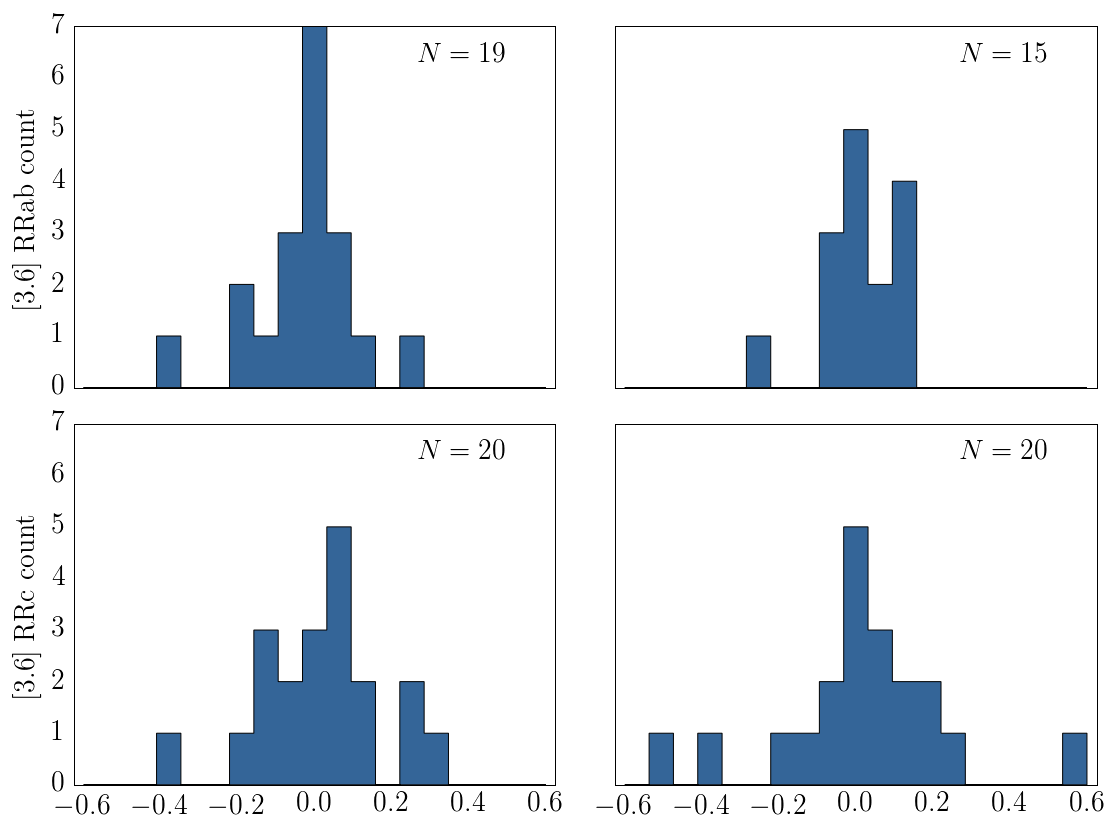

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(8,6))
ax = [ax1, ax2, ax3, ax4]

#bins = np.linspace(-0.6, 0.6, 20)
# bins = np.linspace(phot.min() + 0.5*phot.min(),phot.max()-0.5*phot.max(),84)

for i in range(4):
    ax[i].hist(resids[i].values, bins=bins, color='#346598', histtype='stepfilled', label='In sample', linewidth=0.5)
    ax[i].text(0.5,0.9*ax[i].get_ylim()[1],'$N={}$'.format(len(resids[i].values)), ha='right')
    print np.mean(resids[i].values), np.median(resids[i].values)
    #ax[i].set_xlabel(labels[i])
    ppl.plot(ax[i], [],[])
ax1.set_ylabel('[3.6] RRab count')
ax3.set_ylabel('[3.6] RRc count')
#ax1.set_ylim(0.,15.5)
#ax1.set_yticks(np.linspace(0,15,6))
ax1.set_xlim(-0.625,0.625)
#ppl.legend(ax1, loc='upper left', prop={'size':14}, handlelength = 1)

fig.tight_layout()
fig.subplots_adjust(hspace=0.1)
#fig.savefig('final_plots/resid_hists.pdf')

In [ ]:
#3.6 ab 0.0609201346162 / 0.249645871069  / 0.253562815756
#3.6 c 0.0460132246303 / 0.132020153718  / 0.242967698583
#4.5 ab 0.160184654133 / 0.249645871069  / 0.253562815756
#4.5 c 0.187422270401 / 0.132020153718  / 0.242967698583

# 3 ab 0.0877299290377 0.04 0.047870371665 0.0616844223902
# 3 c 0.102368199291 0.079 0.0409453923154 0.0506134673199
# 4 ab 0.172970474517 0.045 0.0468873844024 0.160297717509
# 4 c 0.20180292728 0.057 0.0477328639205 0.187608622298
import numpy as np

sig = [0.0616844223902, 0.0506134673199, 0.160297717509, 0.187608622298]
spect = [0.249645871069, 0.132020153718, 0.249645871069, 0.132020153718]
phot = [0.253562815756, 0.242967698583, 0.253562815756, 0.242967698583]

for i in range(4):
    print (sig[i]/spect[i], sig[i]/phot[i], np.round(sig[i]/spect[i], decimals=3),
           np.round(sig[i]/phot[i], decimals=3))